In [394]:
import pandas as pd
import numpy as np
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt

In [395]:
cad=data = "/content/drive/MyDrive/Utilidad/"

In [396]:
df= pd.read_excel(cad+"BaseDatos.xlsx", sheet_name='DetalleVentas')

In [397]:
df

,SKU,LOC,FECHA,UNI
0,Art02,LOC_001,2019-04-01,1
1,Art04,LOC_001,2019-04-01,1
2,Art04,LOC_002,2019-04-01,1
3,Art06,LOC_002,2019-04-01,1
4,Art08,LOC_002,2019-04-01,1
...,...,...,...,...
96671,Art04,LOC_417,2019-06-23,1
96672,Art05,LOC_417,2019-06-23,2
96673,Art06,LOC_417,2019-06-23,1
96674,Art07,LOC_417,2019-06-23,1


In [398]:
df['DIA']=df['FECHA'].dt.day_name()

In [399]:
df

,SKU,LOC,FECHA,UNI,DIA
0,Art02,LOC_001,2019-04-01,1,Monday
1,Art04,LOC_001,2019-04-01,1,Monday
2,Art04,LOC_002,2019-04-01,1,Monday
3,Art06,LOC_002,2019-04-01,1,Monday
4,Art08,LOC_002,2019-04-01,1,Monday
...,...,...,...,...,...
96671,Art04,LOC_417,2019-06-23,1,Sunday
96672,Art05,LOC_417,2019-06-23,2,Sunday
96673,Art06,LOC_417,2019-06-23,1,Sunday
96674,Art07,LOC_417,2019-06-23,1,Sunday


In [400]:
df.query("DIA == 'Sunday'" and "DIA == 'Saturday'")

,SKU,LOC,FECHA,UNI,DIA
5637,Art03,LOC_001,2019-04-06,1,Saturday
5638,Art04,LOC_001,2019-04-06,1,Saturday
5639,Art06,LOC_001,2019-04-06,2,Saturday
5640,Art07,LOC_001,2019-04-06,1,Saturday
5641,Art08,LOC_001,2019-04-06,1,Saturday
...,...,...,...,...,...
95709,Art03,LOC_420,2019-06-22,3,Saturday
95710,Art04,LOC_420,2019-06-22,1,Saturday
95711,Art05,LOC_420,2019-06-22,4,Saturday
95712,Art06,LOC_420,2019-06-22,1,Saturday


In [401]:
df_inv=pd.read_excel(cad+"BaseDatos.xlsx", sheet_name='Inventario')

In [402]:
df_inv.drop(columns=df_inv.columns[-2:],axis=1, inplace=True)

In [403]:
df_inv

,SKU,LOC,INVENTARIO_23_06_2019 FINAL DIA
0,Art04,LOC_001,10
1,Art01,LOC_001,10
2,Art02,LOC_001,5
3,Art06,LOC_001,5
4,Art08,LOC_001,5
...,...,...,...
3946,Art10,LOC_420,7
3947,Art01,LOC_420,7
3948,Art02,LOC_420,4
3949,Art04,LOC_420,4


In [404]:
print(set(df["LOC"]))

{'LOC_141', 'LOC_069', 'LOC_343', 'LOC_288', 'LOC_046', 'LOC_118', 'LOC_259', 'LOC_278', 'LOC_078', 'LOC_057', 'LOC_114', 'LOC_139', 'LOC_220', 'LOC_120', 'LOC_033', 'LOC_232', 'LOC_356', 'LOC_209', 'LOC_340', 'LOC_231', 'LOC_329', 'LOC_024', 'LOC_123', 'LOC_199', 'LOC_397', 'LOC_355', 'LOC_038', 'LOC_407', 'LOC_342', 'LOC_222', 'LOC_194', 'LOC_311', 'LOC_126', 'LOC_070', 'LOC_041', 'LOC_240', 'LOC_035', 'LOC_176', 'LOC_223', 'LOC_050', 'LOC_415', 'LOC_004', 'LOC_385', 'LOC_252', 'LOC_310', 'LOC_371', 'LOC_295', 'LOC_357', 'LOC_229', 'LOC_202', 'LOC_040', 'LOC_348', 'LOC_338', 'LOC_249', 'LOC_105', 'LOC_328', 'LOC_094', 'LOC_365', 'LOC_142', 'LOC_045', 'LOC_235', 'LOC_172', 'LOC_053', 'LOC_080', 'LOC_084', 'LOC_372', 'LOC_204', 'LOC_200', 'LOC_270', 'LOC_108', 'LOC_253', 'LOC_180', 'LOC_189', 'LOC_260', 'LOC_378', 'LOC_007', 'LOC_020', 'LOC_337', 'LOC_388', 'LOC_125', 'LOC_336', 'LOC_130', 'LOC_379', 'LOC_005', 'LOC_221', 'LOC_085', 'LOC_333', 'LOC_325', 'LOC_224', 'LOC_293', 'LOC_187'

## Baseline (Prueba)

Se filtra la base de datos para obtener los de las 2 úlitmas semanas y aplicar:

INV_BASE = 1.0 + VENTA PROMEDIO DE LAS ULTIMAS 2 SEMANAS

In [405]:
firstday = df['FECHA'].min()
q_day = firstday + datetime.timedelta(days=14) #13

In [406]:
q_day

Timestamp('2019-04-15 00:00:00')

In [407]:
#Se guardan esos valores
df2lw = df[(df['FECHA'] >= firstday) & (df['FECHA'] <= q_day)]

In [408]:
df2lw=df2lw.reset_index(drop=True)

In [409]:
df2lw

,SKU,LOC,FECHA,UNI,DIA
0,Art02,LOC_001,2019-04-01,1,Monday
1,Art04,LOC_001,2019-04-01,1,Monday
2,Art04,LOC_002,2019-04-01,1,Monday
3,Art06,LOC_002,2019-04-01,1,Monday
4,Art08,LOC_002,2019-04-01,1,Monday
...,...,...,...,...,...
17600,Art04,LOC_410,2019-04-15,1,Monday
17601,Art06,LOC_410,2019-04-15,1,Monday
17602,Art07,LOC_411,2019-04-15,1,Monday
17603,Art08,LOC_411,2019-04-15,1,Monday


In [410]:
#Dataframe con los promedios de las 2 últimas semanas
df_base=pd.pivot_table(df2lw, index = ['LOC', "SKU"], values=["UNI"], aggfunc={'mean'})
df_base

UNI
                    mean
LOC     SKU             
LOC_001 Art01   2.500000
        Art02   1.714286
        Art03   1.750000
        Art04   1.000000
        Art06   1.666667
...                  ...
LOC_420 Art04   5.700000
        Art05  11.000000
        Art06   7.333333
        Art07   4.100000
        Art10   5.230769

[3521 rows x 1 columns]

In [411]:
#Dataframe con los promedios de las 2 últimas semanas + 1
(df_base+1)

UNI
                    mean
LOC     SKU             
LOC_001 Art01   3.500000
        Art02   2.714286
        Art03   2.750000
        Art04   2.000000
        Art06   2.666667
...                  ...
LOC_420 Art04   6.700000
        Art05  12.000000
        Art06   8.333333
        Art07   5.100000
        Art10   6.230769

[3521 rows x 1 columns]

In [412]:
(df_base+1).round()

UNI
               mean
LOC     SKU        
LOC_001 Art01   4.0
        Art02   3.0
        Art03   3.0
        Art04   2.0
        Art06   3.0
...             ...
LOC_420 Art04   7.0
        Art05  12.0
        Art06   8.0
        Art07   5.0
        Art10   6.0

[3521 rows x 1 columns]

## Baseline 14 semanas


In [413]:
firstday= []
lastday=[]
firstday.append(df['FECHA'].min())
for i in range(12):
  lastday.append(firstday[i] + datetime.timedelta(days=14)) #13
  firstday.append(lastday[i] -  datetime.timedelta(days=7))

In [414]:
firstday

[Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-04-08 00:00:00'),
 Timestamp('2019-04-15 00:00:00'),
 Timestamp('2019-04-22 00:00:00'),
 Timestamp('2019-04-29 00:00:00'),
 Timestamp('2019-05-06 00:00:00'),
 Timestamp('2019-05-13 00:00:00'),
 Timestamp('2019-05-20 00:00:00'),
 Timestamp('2019-05-27 00:00:00'),
 Timestamp('2019-06-03 00:00:00'),
 Timestamp('2019-06-10 00:00:00'),
 Timestamp('2019-06-17 00:00:00'),
 Timestamp('2019-06-24 00:00:00')]

In [415]:
lastday

[Timestamp('2019-04-15 00:00:00'),
 Timestamp('2019-04-22 00:00:00'),
 Timestamp('2019-04-29 00:00:00'),
 Timestamp('2019-05-06 00:00:00'),
 Timestamp('2019-05-13 00:00:00'),
 Timestamp('2019-05-20 00:00:00'),
 Timestamp('2019-05-27 00:00:00'),
 Timestamp('2019-06-03 00:00:00'),
 Timestamp('2019-06-10 00:00:00'),
 Timestamp('2019-06-17 00:00:00'),
 Timestamp('2019-06-24 00:00:00'),
 Timestamp('2019-07-01 00:00:00')]

In [416]:
weeks=["semana" +str(x).zfill(2) for x in range(3,15)]

In [417]:
d = {}
for i in range(len(weeks)):
    aux = df[(df['FECHA'] >= firstday[i]) & (df['FECHA'] <= lastday[i])]
    aux=aux.reset_index(drop=True)
    #Dataframe con los promedios de las 2 últimas semanas
    df_base=pd.pivot_table(aux, index = ['LOC', "SKU"], values=["UNI"], aggfunc={'mean'})
    df_base.reset_index(inplace=True)
    df_base["Tienda"] = df_base["LOC"] +" "+ df_base["SKU"]
    temp=df_base[['Tienda','UNI']]
    temp.set_index('Tienda',inplace=True)
    d[weeks[i]]=temp

In [418]:
total=(pd.concat([d[x] for x in weeks],axis=1,sort=True).set_axis(labels=weeks,axis=1)).fillna(0)

In [419]:
total

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13,semana14
Tienda,,,,,,,,,,,,
LOC_001 Art01,2.500000,2.166667,2.000000,2.000000,2.428571,2.545455,2.800000,3.714286,2.875000,2.444444,2.000000,1.500000
LOC_001 Art02,1.714286,2.000000,1.714286,1.428571,2.200000,1.500000,1.200000,1.428571,1.500000,1.166667,1.400000,2.000000
LOC_001 Art03,1.750000,1.500000,1.200000,1.250000,1.375000,1.400000,1.000000,1.000000,1.750000,1.833333,1.600000,1.500000
LOC_001 Art04,1.000000,1.000000,1.000000,1.000000,1.250000,1.285714,1.200000,1.200000,1.250000,1.250000,2.000000,2.500000
LOC_001 Art06,1.666667,1.600000,2.333333,2.300000,2.000000,2.090909,2.181818,1.545455,1.307692,1.461538,1.833333,1.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
LOC_420 Art04,5.700000,6.250000,0.000000,7.000000,5.666667,4.333333,3.727273,1.600000,2.181818,2.700000,2.200000,2.666667
LOC_420 Art05,11.000000,11.333333,13.800000,12.181818,12.846154,12.500000,9.000000,5.333333,5.333333,7.533333,9.846154,11.000000
LOC_420 Art06,7.333333,7.400000,6.600000,7.833333,9.384615,8.923077,6.272727,2.222222,2.181818,3.272727,3.636364,2.833333


In [420]:
total+1

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13,semana14
Tienda,,,,,,,,,,,,
LOC_001 Art01,3.500000,3.166667,3.000000,3.000000,3.428571,3.545455,3.800000,4.714286,3.875000,3.444444,3.000000,2.500000
LOC_001 Art02,2.714286,3.000000,2.714286,2.428571,3.200000,2.500000,2.200000,2.428571,2.500000,2.166667,2.400000,3.000000
LOC_001 Art03,2.750000,2.500000,2.200000,2.250000,2.375000,2.400000,2.000000,2.000000,2.750000,2.833333,2.600000,2.500000
LOC_001 Art04,2.000000,2.000000,2.000000,2.000000,2.250000,2.285714,2.200000,2.200000,2.250000,2.250000,3.000000,3.500000
LOC_001 Art06,2.666667,2.600000,3.333333,3.300000,3.000000,3.090909,3.181818,2.545455,2.307692,2.461538,2.833333,2.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
LOC_420 Art04,6.700000,7.250000,1.000000,8.000000,6.666667,5.333333,4.727273,2.600000,3.181818,3.700000,3.200000,3.666667
LOC_420 Art05,12.000000,12.333333,14.800000,13.181818,13.846154,13.500000,10.000000,6.333333,6.333333,8.533333,10.846154,12.000000
LOC_420 Art06,8.333333,8.400000,7.600000,8.833333,10.384615,9.923077,7.272727,3.222222,3.181818,4.272727,4.636364,3.833333


In [421]:
inventario=total.copy()

## Redondeo

Caso de 3 productos:

In [422]:
word="Art02"

In [423]:
lista02=[ele for ele in inventario.index if(word in ele)]

In [424]:
inventario.loc[lista02]=(inventario.loc[lista02]/3).round()

In [425]:
total.loc[lista02]

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13,semana14
Tienda,,,,,,,,,,,,
LOC_001 Art02,1.714286,2.000000,1.714286,1.428571,2.200000,1.500000,1.200000,1.428571,1.500000,1.166667,1.400000,2.000000
LOC_002 Art02,1.500000,1.250000,1.500000,1.250000,1.000000,1.000000,1.000000,1.166667,1.333333,1.500000,1.250000,1.000000
LOC_003 Art02,1.400000,1.125000,1.125000,1.555556,1.600000,1.500000,1.500000,1.166667,1.250000,1.250000,1.400000,2.000000
LOC_004 Art02,1.166667,1.333333,1.333333,1.250000,1.000000,1.000000,1.333333,1.200000,1.272727,1.428571,1.200000,1.250000
LOC_005 Art02,1.333333,1.142857,1.142857,1.833333,2.200000,1.444444,1.454545,1.727273,1.750000,2.000000,2.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
LOC_413 Art02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,6.000000
LOC_414 Art02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
LOC_415 Art02,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000


In [426]:
inventario.loc[lista02]

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13,semana14
Tienda,,,,,,,,,,,,
LOC_001 Art02,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
LOC_002 Art02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LOC_003 Art02,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
LOC_004 Art02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LOC_005 Art02,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
LOC_413 Art02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
LOC_414 Art02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
LOC_415 Art02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Caso de 2 productos:

In [427]:
word="Art03"

In [428]:
lista03=[ele for ele in inventario.index if(word in ele)]

In [429]:
inventario.loc[lista03]=(inventario.loc[lista03]/2).apply(np.ceil)

In [430]:
total.loc[lista03]

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13,semana14
Tienda,,,,,,,,,,,,
LOC_001 Art03,1.750000,1.500000,1.200000,1.250000,1.375000,1.400000,1.000000,1.000000,1.750000,1.833333,1.600000,1.5
LOC_002 Art03,2.500000,2.375000,2.333333,2.090909,2.000000,1.727273,1.857143,2.125000,2.555556,2.750000,2.375000,2.6
LOC_003 Art03,1.666667,1.428571,1.900000,2.000000,2.181818,1.916667,1.571429,1.818182,2.400000,2.500000,2.375000,2.0
LOC_004 Art03,1.111111,1.200000,1.666667,1.500000,1.166667,1.250000,1.375000,1.375000,1.333333,1.000000,1.000000,0.0
LOC_005 Art03,3.533333,2.642857,1.846154,2.615385,3.214286,3.200000,3.066667,2.466667,2.692308,2.692308,2.636364,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...
LOC_413 Art03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.750000,11.0
LOC_414 Art03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.500000,1.5
LOC_415 Art03,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0


In [431]:
inventario.loc[lista03]

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13,semana14
Tienda,,,,,,,,,,,,
LOC_001 Art03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LOC_002 Art03,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
LOC_003 Art03,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0
LOC_004 Art03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
LOC_005 Art03,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
LOC_413 Art03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,6.0
LOC_414 Art03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
LOC_415 Art03,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [432]:
word="Art06"

In [433]:
lista06=[ele for ele in inventario.index if(word in ele)]

In [434]:
inventario.loc[lista06]=(inventario.loc[lista06]/2).apply(np.floor)

In [435]:
total.loc[lista06]

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13,semana14
Tienda,,,,,,,,,,,,
LOC_001 Art06,1.666667,1.600000,2.333333,2.300000,2.000000,2.090909,2.181818,1.545455,1.307692,1.461538,1.833333,1.833333
LOC_002 Art06,1.111111,1.300000,1.222222,1.333333,1.666667,1.300000,1.250000,1.857143,1.875000,1.500000,1.875000,2.000000
LOC_003 Art06,1.200000,1.750000,2.000000,1.571429,1.800000,1.500000,1.200000,1.000000,1.000000,1.200000,1.200000,1.000000
LOC_004 Art06,1.500000,1.200000,1.333333,1.428571,1.500000,1.750000,2.428571,1.888889,1.800000,1.888889,1.625000,1.666667
LOC_005 Art06,1.250000,1.571429,1.666667,1.555556,1.500000,1.555556,1.600000,1.666667,1.666667,1.444444,1.428571,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
LOC_414 Art06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.500000,1.000000
LOC_415 Art06,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
LOC_416 Art06,1.333333,1.000000,1.000000,1.250000,1.500000,1.500000,1.200000,1.200000,1.333333,1.000000,1.000000,1.000000


In [436]:
inventario.loc[lista06]

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13,semana14
Tienda,,,,,,,,,,,,
LOC_001 Art06,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
LOC_002 Art06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
LOC_003 Art06,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LOC_004 Art06,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
LOC_005 Art06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
LOC_414 Art06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
LOC_415 Art06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LOC_416 Art06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [437]:
inventario=inventario.round()

Final

In [438]:
total

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13,semana14
Tienda,,,,,,,,,,,,
LOC_001 Art01,2.500000,2.166667,2.000000,2.000000,2.428571,2.545455,2.800000,3.714286,2.875000,2.444444,2.000000,1.500000
LOC_001 Art02,1.714286,2.000000,1.714286,1.428571,2.200000,1.500000,1.200000,1.428571,1.500000,1.166667,1.400000,2.000000
LOC_001 Art03,1.750000,1.500000,1.200000,1.250000,1.375000,1.400000,1.000000,1.000000,1.750000,1.833333,1.600000,1.500000
LOC_001 Art04,1.000000,1.000000,1.000000,1.000000,1.250000,1.285714,1.200000,1.200000,1.250000,1.250000,2.000000,2.500000
LOC_001 Art06,1.666667,1.600000,2.333333,2.300000,2.000000,2.090909,2.181818,1.545455,1.307692,1.461538,1.833333,1.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
LOC_420 Art04,5.700000,6.250000,0.000000,7.000000,5.666667,4.333333,3.727273,1.600000,2.181818,2.700000,2.200000,2.666667
LOC_420 Art05,11.000000,11.333333,13.800000,12.181818,12.846154,12.500000,9.000000,5.333333,5.333333,7.533333,9.846154,11.000000
LOC_420 Art06,7.333333,7.400000,6.600000,7.833333,9.384615,8.923077,6.272727,2.222222,2.181818,3.272727,3.636364,2.833333


In [439]:
inventario

,semana03,semana04,semana05,semana06,semana07,semana08,semana09,semana10,semana11,semana12,semana13,semana14
Tienda,,,,,,,,,,,,
LOC_001 Art01,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,2.0,2.0,2.0
LOC_001 Art02,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
LOC_001 Art03,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LOC_001 Art04,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
LOC_001 Art06,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
LOC_420 Art04,6.0,6.0,0.0,7.0,6.0,4.0,4.0,2.0,2.0,3.0,2.0,3.0
LOC_420 Art05,11.0,11.0,14.0,12.0,13.0,12.0,9.0,5.0,5.0,8.0,10.0,11.0
LOC_420 Art06,3.0,3.0,3.0,3.0,4.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0


In [440]:
pr=inventario.T["LOC_420 Art10"]

In [441]:
pr2=inventario.T.iloc[:,0]

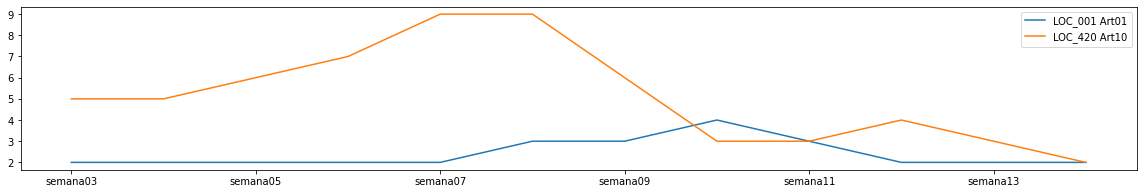

In [442]:
pr2.plot(figsize=(20,3))
pr.plot(figsize=(20,3))
plt.legend()

## Inventario existente semana 13


In [443]:
df_inv

,SKU,LOC,INVENTARIO_23_06_2019 FINAL DIA
0,Art04,LOC_001,10
1,Art01,LOC_001,10
2,Art02,LOC_001,5
3,Art06,LOC_001,5
4,Art08,LOC_001,5
...,...,...,...
3946,Art10,LOC_420,7
3947,Art01,LOC_420,7
3948,Art02,LOC_420,4
3949,Art04,LOC_420,4


In [444]:
df_inv["Tienda"] = df_inv["LOC"] +" "+ df_inv["SKU"]
temp_inv=df_inv[['Tienda','INVENTARIO_23_06_2019 FINAL DIA']]

In [445]:
temp_inv.set_index('Tienda',inplace=True)
temp_inv=temp_inv.sort_index()

In [446]:
inventario[["semana13"]]

,semana13
Tienda,
LOC_001 Art01,2.0
LOC_001 Art02,0.0
LOC_001 Art03,1.0
LOC_001 Art04,2.0
LOC_001 Art06,0.0
...,...
LOC_420 Art04,2.0
LOC_420 Art05,10.0
LOC_420 Art06,1.0


In [447]:
temp_inv

,INVENTARIO_23_06_2019 FINAL DIA
Tienda,
LOC_001 Art01,10
LOC_001 Art02,5
LOC_001 Art03,0
LOC_001 Art04,10
LOC_001 Art06,5
...,...
LOC_420 Art04,4
LOC_420 Art05,10
LOC_420 Art06,10


In [457]:
new=pd.concat([temp_inv, inventario[["semana13"]]],axis=1,sort=True)

In [458]:
new

,INVENTARIO_23_06_2019 FINAL DIA,semana13
Tienda,,
LOC_001 Art01,10,2.0
LOC_001 Art02,5,0.0
LOC_001 Art03,0,1.0
LOC_001 Art04,10,2.0
LOC_001 Art06,5,0.0
...,...,...
LOC_420 Art04,4,2.0
LOC_420 Art05,10,10.0
LOC_420 Art06,10,1.0


In [460]:
inventario[["semana13"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3929 entries, LOC_001 Art01 to LOC_420 Art10
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   semana13  3929 non-null   float64
dtypes: float64(1)
memory usage: 190.4+ KB


In [461]:
new["INVENTARIO_23_06_2019 FINAL DIA"]- new["semana13"]

Tienda
LOC_001 Art01    8.0
LOC_001 Art02    5.0
LOC_001 Art03   -1.0
LOC_001 Art04    8.0
LOC_001 Art06    5.0
                ... 
LOC_420 Art04    2.0
LOC_420 Art05    0.0
LOC_420 Art06    9.0
LOC_420 Art07    0.0
LOC_420 Art10    4.0
Length: 3951, dtype: float64